In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata
import matplotlib as mpl

In [4]:
df = pd.read_csv('Option2017_2_Clean.csv')
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Unnamed:_0,ExpDate,StrikePrice,Ticker,Type,Last,Chg,Bid,Ask,Vol,Open_Int,Delta,Gamma,Rho,Theta,Vega,Implied_volatility,currentDate,Underlaying_asset_price,Expiration_Date
0,0,17-Mar-17,22.5,ARR,Put,0.95,-0.35,0.65,1.25,1.0,9.0,-0.69794,0.28368,-0.00832,-0.00832,0.02372,0.27590,2/17/2017,21.709999,0.076660
1,1,21-Apr-17,22.0,ARR,Call,0.30,-0.20,0.10,0.40,40.0,659.0,0.45441,0.55431,0.01692,-0.00408,0.03730,0.10719,2/17/2017,21.709999,0.172485
2,2,21-Apr-17,20.0,ARR,Put,0.15,-0.05,0.05,0.20,3.0,251.0,-0.12236,0.11984,-0.00430,-0.00275,0.01999,0.25595,2/17/2017,21.709999,0.172485
3,3,21-Apr-17,22.0,ARR,Put,0.83,-0.02,0.65,1.00,1.0,166.0,-0.52709,0.26444,-0.01502,-0.00457,0.03551,0.21858,2/17/2017,21.709999,0.172485
4,4,21-Apr-17,23.0,ARR,Put,1.55,0.05,1.40,1.85,2.0,145.0,-0.68386,0.17777,-0.01760,-0.00590,0.03575,0.33344,2/17/2017,21.709999,0.172485


In [5]:
def plot_iv(ticker, plot_loc):
    stock = df[df.Ticker == ticker]
    
    k = np.linspace(stock['StrikePrice'].min(), stock['StrikePrice'].max(), len(np.unique(stock['StrikePrice'])))
    t = np.linspace(stock['Expiration_Date'].min(), stock['Expiration_Date'].max(),
                    len(np.unique(stock['Expiration_Date'])))
    k, t = np.meshgrid(k, t)
    implied_vol = griddata((stock['StrikePrice'],stock['Expiration_Date']),stock['Implied_volatility'],(k,t),method='cubic')
    t_inx=~np.isnan(implied_vol)
    CM = (implied_vol - implied_vol[t_inx].mean()) / (implied_vol[t_inx].max())
    
    ax = fig_iv.add_subplot(plot_loc, projection='3d')
    surf = ax.plot_surface(k, t, implied_vol,rstride=1, cstride=1, facecolors=cm.coolwarm(CM),
                           edgecolor='r', lw=0.5, antialiased=False,alpha=0.8)
    ax.set_xlabel('Strike Price')
    ax.set_ylabel('Time to Maturity')
    ax.set_zlabel('Implied Volatility')
    ax.set_title(ticker + ' Implied Volatility 3D Plot', fontsize=18)
    m = cm.ScalarMappable(cmap=cm.coolwarm)
    m.set_array(implied_vol)
    cbar = plt.colorbar(m)

/Users/yu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/yu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  


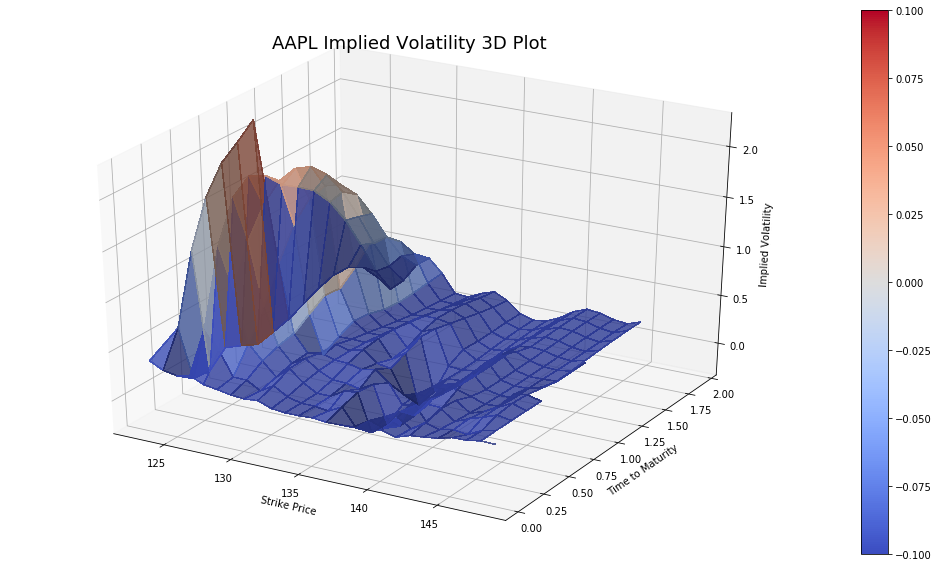

In [6]:
fig_iv = plt.figure(figsize=(18,10))

plot_iv('AAPL', 111)

plt.show()

Option2017_clean_.csvis saved in/Users/yu/Fintech/3D_plot

(279, 19)
AAPL_option_data_2017.csvis saved in/Users/yu/Fintech/3D_plot

Total different strike prices:26
Total different expiration_time:14


/Users/yu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Z contains NaN values. This may result in rendering artifacts.


AAPL_IVS.tiffis saved!



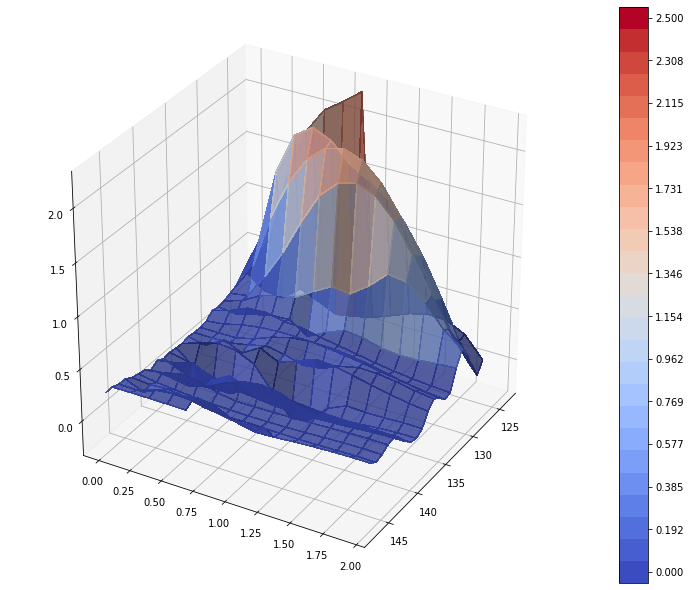

In [7]:
import numpy as np
import pandas as pd 
import os
import sys
import io
option_df=pd.read_csv('Option2017_2_Clean.csv')
option_df=option_df.drop(labels=[option_df.columns[0]],axis=1)
filename='Option2017_clean_.csv'
option_df.to_csv(filename)
if os.path.isfile(filename):
  print(filename +'is saved in'+ os.getcwd() +'\n')
else:
  print('Error: Cannot find the file\n')
import matplotlib.pyplot as plot
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import time
from scipy.interpolate import griddata
from matplotlib import cm
AAPL_option_data=option_df[option_df['Ticker']=='AAPL']
AAPL_option_data=AAPL_option_data.dropna()
AAPL_option_data.head()
print(AAPL_option_data.shape)
filename='AAPL_option_data_2017.csv'
AAPL_option_data.to_csv(filename)
if os.path.isfile(filename):
  print(filename +'is saved in'+ os.getcwd() +'\n')
else:
  print('Error: Cannot find the file\n')
AAPL_data=AAPL_option_data
strike_price=AAPL_data['StrikePrice']
implied_volatility=AAPL_data['Implied volatility']
expiration_time=AAPL_data['Expiration Date']
##sampling
N_=len(np.unique(np.array(strike_price)))
print('Total different strike prices:' + str(N_))
x=np.linspace(min(strike_price), max(strike_price),N_)

M_=len(np.unique(np.array(expiration_time)))
print('Total different expiration_time:' + str(M_))
y=np.linspace(min(expiration_time), max(expiration_time),M_)
#2D meshgrid
X,Y=np.meshgrid(x,y)
#interplolation
#visualize implied_volatility--> we need do interpolation here(not all info is known)
Z=griddata((strike_price,expiration_time),implied_volatility,(X,Y),method='cubic')
t_inx=~np.isnan(Z)
#normalize Z vector to get CM for colormap
CM=(Z-Z[t_inx].mean())/(Z[t_inx].max())
fig=plot.figure(figsize=(10,8))
ax=Axes3D(fig)
##ues diverging colormap
surf=ax.plot_surface(X,Y,Z,rstride=1,cstride=1,facecolors=cm.coolwarm(CM),edgecolor='r',linewidth=0.5,
                     antialiased=False,alpha=0.8)
ax.set_xlabel=('strike price')
ax.set_ylabel=('time to maturity')
ax.set_zlabel=('implied volatility')
ax.set_xlim([strike_price.min()-0.5,strike_price.max()+0.5])
ax.set_ylim([expiration_time.min()-0.1,expiration_time.max()+0.1])
ax.view_init(azim=30)
norm=mpl.colors.Normalize(vmin=0,vmax=2.5)
sm=plot.cm.ScalarMappable(cmap=cm.coolwarm,norm=norm)
sm.set_array([])
plot.colorbar(sm,ticks=np.linspace(0,2.5,14),boundaries=np.arange(-0.05,2.6,.1))
filename='AAPL_IVS.tiff'
plot.savefig(filename,format='tiff',dpi=600)
print(filename+'is saved!\n')